## Continuous/numerical predictors

In [1]:
library('tidymodels')
library('palmerpenguins')

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/


Attaching package: ‘palmerpenguins’


The following object is masked from ‘package:modelda

In [2]:
mod = linear_reg() |> set_engine('lm')

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


In [3]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


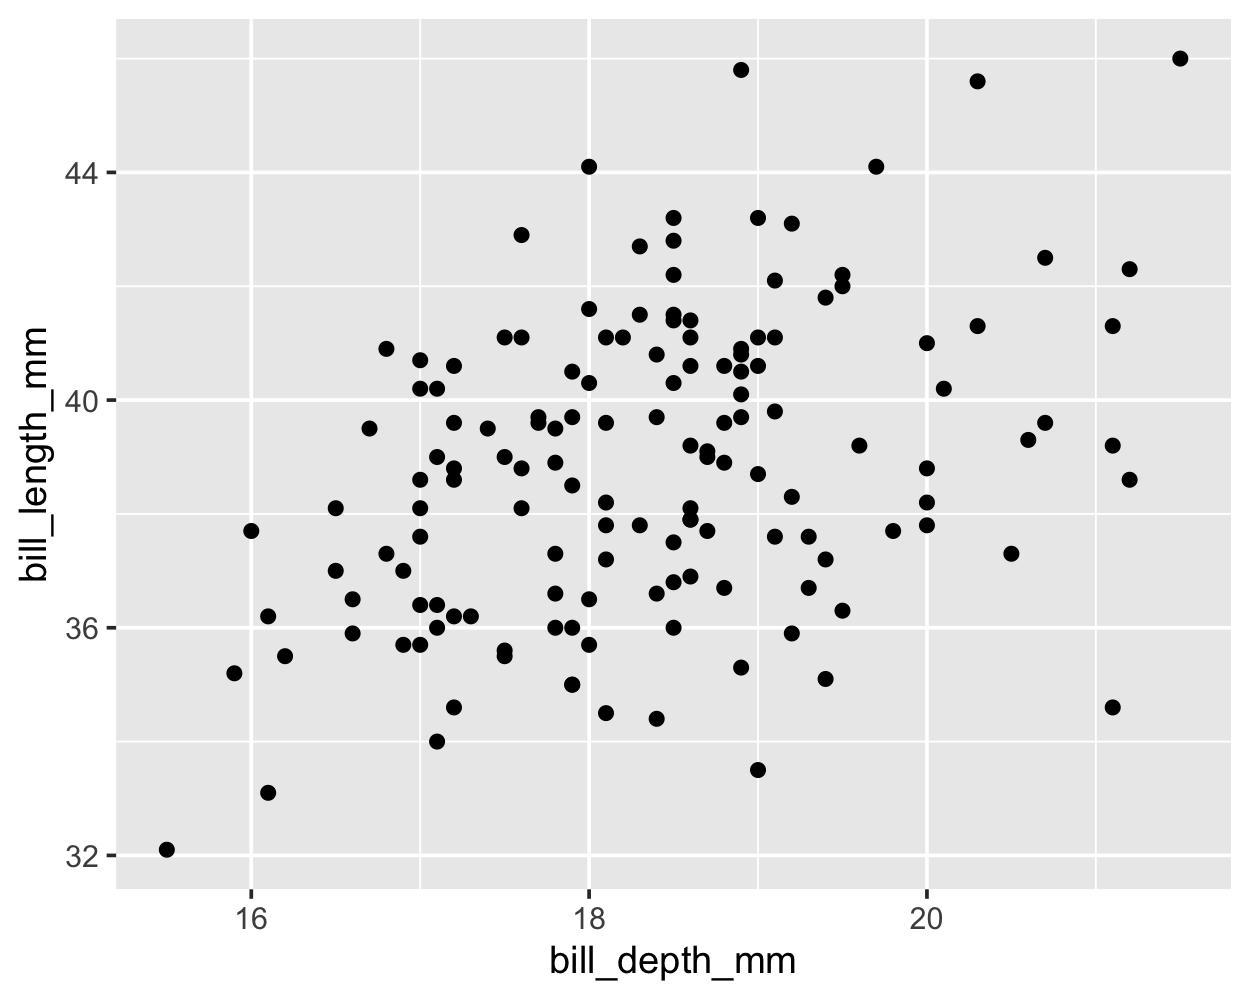

In [4]:
adelie = penguins |> drop_na() |> filter(species == 'Adelie')

adelie |>
ggplot(aes(x = bill_depth_mm, y = bill_length_mm)) + 
    geom_point()

In [5]:
mod = linear_reg() |> set_engine('lm')

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


In [6]:
mod_fit = mod |> fit(bill_length_mm ~ bill_depth_mm, data = adelie)

mod_fit

parsnip model object


Call:
stats::lm(formula = bill_length_mm ~ bill_depth_mm, data = data)

Coefficients:
  (Intercept)  bill_depth_mm  
      23.3668         0.8425  


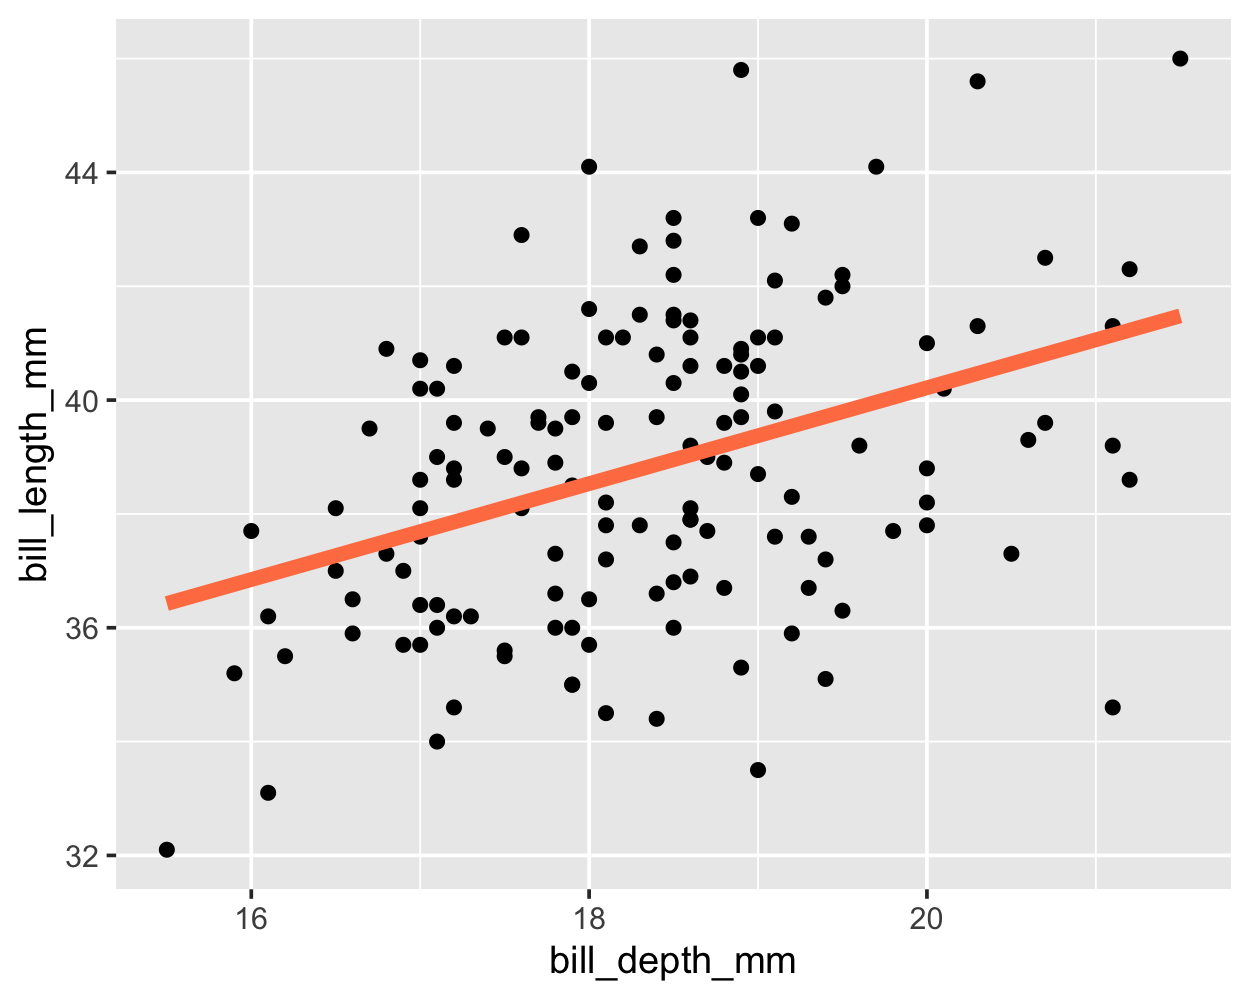

In [7]:
predict(mod_fit, adelie) |>
    bind_cols(adelie) |>
ggplot(aes(x = bill_depth_mm, y = bill_length_mm)) + 
    geom_point() +
    geom_line(aes(y = .pred), color = 'coral', linewidth = 2)

## Categorical predictors

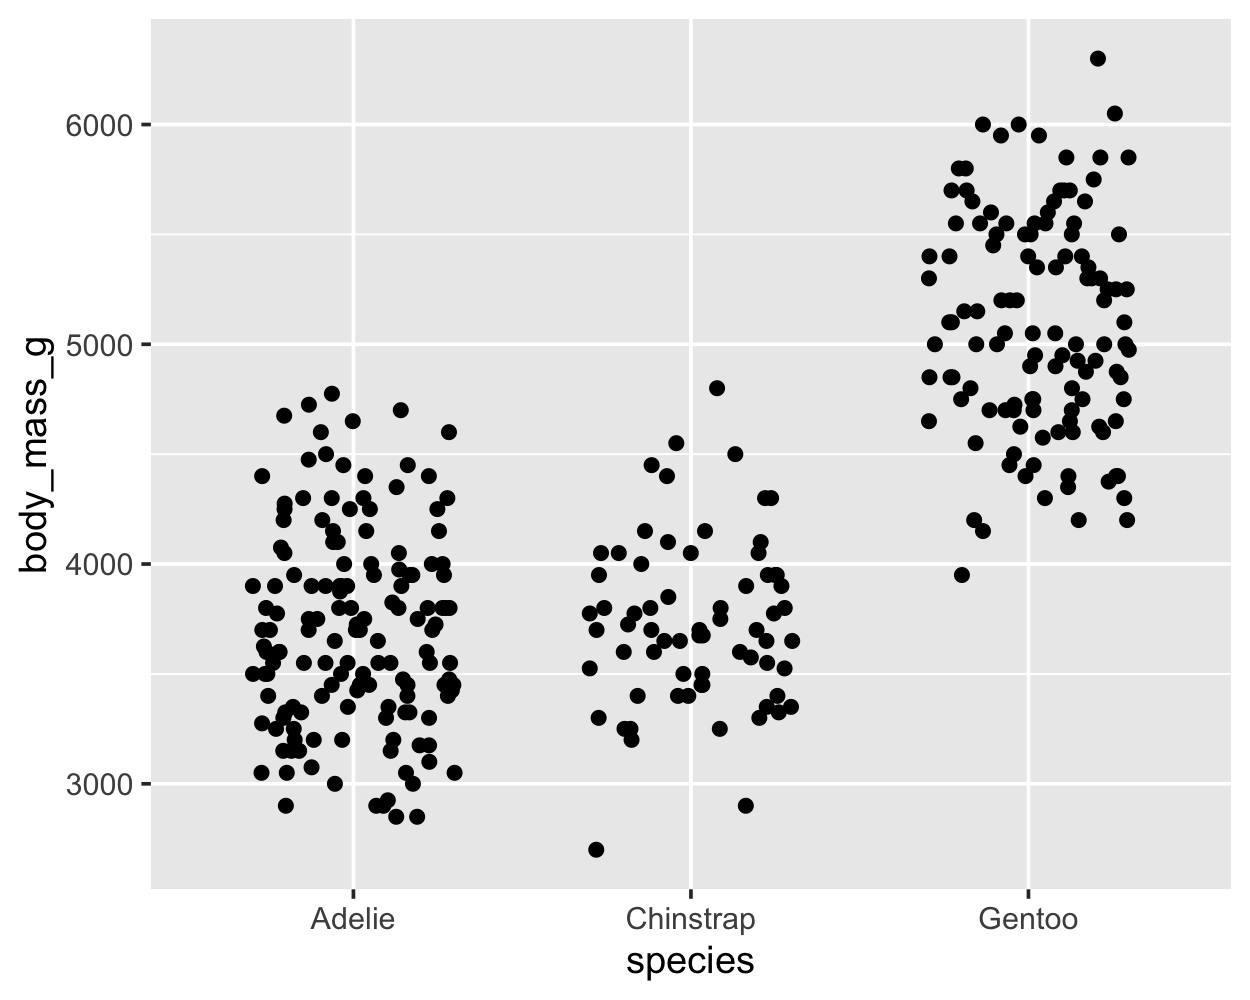

In [8]:
penguins2 = penguins |> drop_na()

penguins2 |>
ggplot(aes(x = species, y = body_mass_g)) +
    geom_point(position = position_jitter(height = 0, width = 0.3))

In [9]:
mod = linear_reg() |> set_engine('lm')

rec = recipe(body_mass_g ~ species, data = penguins2) |>
    step_dummy(species) |>
    prep()

rec |> juice() |> head()

body_mass_g,species_Chinstrap,species_Gentoo
<int>,<dbl>,<dbl>
3750,0,0
3800,0,0
3250,0,0
3450,0,0
3650,0,0
3625,0,0


In [10]:
mod_fit = mod |> fit(body_mass_g ~ ., data = rec |> juice())

mod_fit

parsnip model object


Call:
stats::lm(formula = body_mass_g ~ ., data = data)

Coefficients:
      (Intercept)  species_Chinstrap     species_Gentoo  
          3706.16              26.92            1386.27  


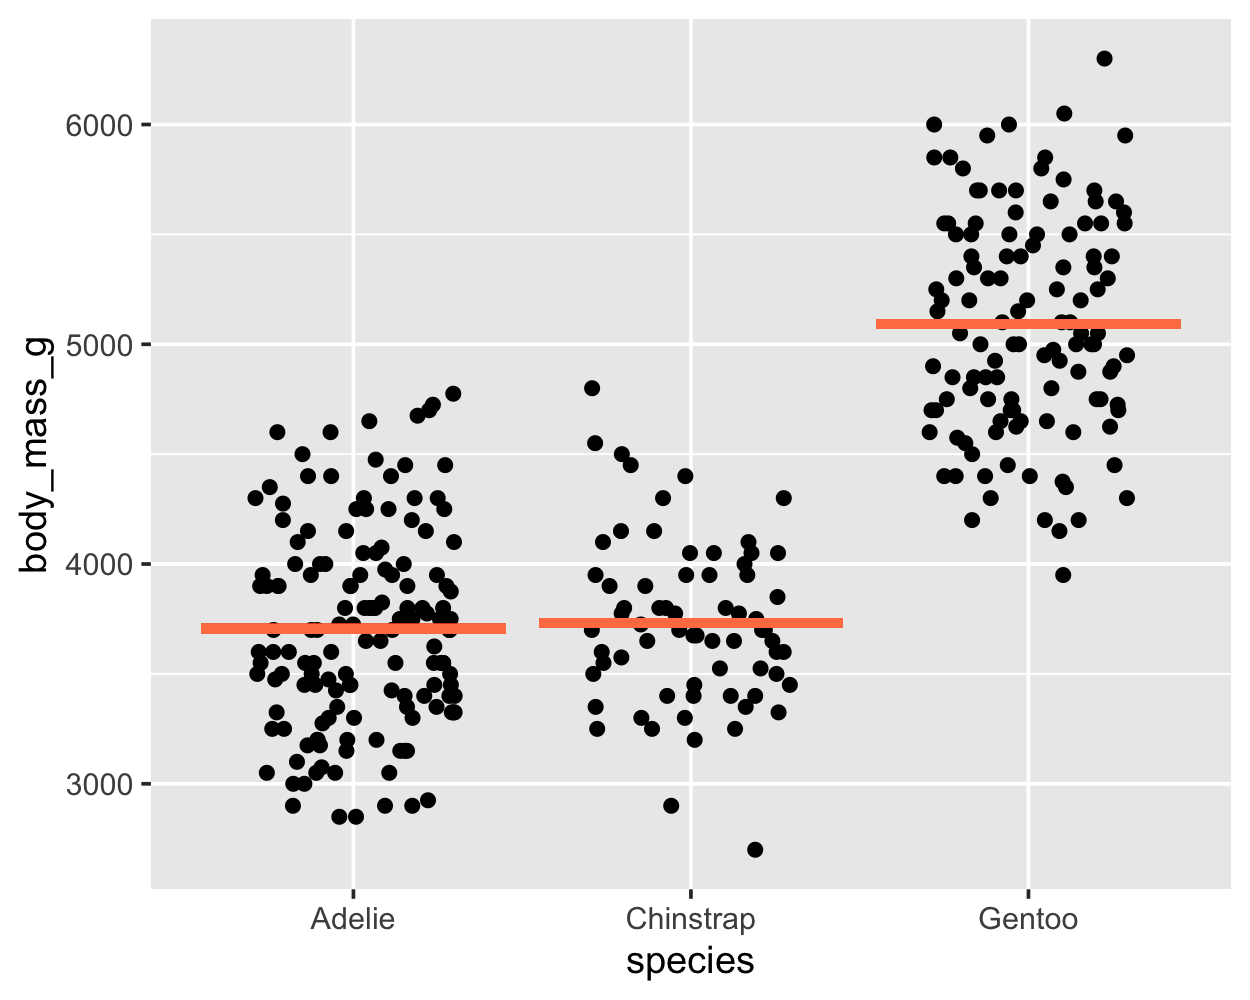

In [11]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(penguins2) |>
ggplot(aes(x = species, y = body_mass_g)) +
    geom_point(position = position_jitter(height = 0, width = 0.3)) +
    geom_crossbar(aes( y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')